# Project: Investigate a Dataset - TMDb movie dataset

## Table of Contents
<ul>
<li>Introduction</a></li>
<li>Data Wrangling</a></li>
<li>Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb.

### Columns : 
<ul>
    <li>id                   : Movie ID relatead to the table.</li>
    <li>imdb_id              : Movie ID on IMDB.</li>
    <li>popularity           : Popularity score.</li>
    <li>budget               : Movie Total cost on production in dollars.</li>
    <li>revenue              : Movie total gain on production in dollars.</li>
    <li>original_title       : Movie title.</li>
    <li>cast                 : Movie actors.</li> 
    <li>homepage             : Movie offical website.</li>
    <li>director             : Movie directors.</li> 
    <li>tagline              : Movie tags.</li> 
    <li>keywords             : Movie keywords.</li> 
    <li>runtime              : Movie period in minutes.</li>
    <li>genres               : Movie genres.</li>
    <li>production_companies : Movie producer companies.</li>
    <li>release_date         : Movie release date</li>
    <li>vote_count           : Voters count on IMDB</li>
    <li>vote_average         : Voteing average score on IMDB</li>
    <li>budget_adj           : Movie total cost on production in terms of 2010 dollars, accounting for inflation over time.</li>
    <li>revenue_adj          : Movie total gain on production in terms of 2010 dollars, accounting for inflation over time.</li>
    </ul>

### Questions for Analysis
<ul>
    <li>What is the relation between movies attributes?</li>
    <li>What the distribution of rating?</li>
    <li>How many movie released by year?</li>
    <li>How total revenue and budget affected by years?</li>
    <li>What movie has the most revenue,  budget, net profit?</li>
    <li>What movie is the top rated in each year?</li>
    <li> Whom Actor has the top popularity movies in average, Whom Actor has the best rating in average, whose movies achived more revenue in total after 1995?</li>
    <li>How many companies loss and how many profit?</li>
    <li>Which genres are most popular, top rating, top revenue in average??</li>    
</ul>


#### Data Importing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_theme(style='darkgrid')

In [3]:
movies = pd.read_csv('tmdb-movies.csv')

## Data Wrangling

In [4]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
movies.duplicated().sum()

1

## Data Cleaning

#### Remove Columns
<dl>
     <li>'imdb_id'   : it gaves the same meaning as id and aslo have missing values</li>
     <li>'homepage' : it have too much misiing values</li>
     <li>'tagline','keywords'  : it's not needed for questions</li>
</dl>

In [7]:
movies.drop(['imdb_id','homepage','tagline','keywords'], axis=1, inplace = True)

#### Remove duplicated rows

In [8]:
movies.drop_duplicates(inplace = True)
movies.reset_index(drop=True,inplace = True)

#### Make date represented by one column

In [9]:
#Checking years are the same
(movies['release_date'].str[-2:] !=  movies['release_year'].astype('string').str[-2:]).sum()

0

In [10]:
#changing years
movies['release_date'] = movies['release_date'].str[:-2]+movies['release_year'].astype('string')

#drop 'releas_year' column
movies.drop(['release_year'], axis=1, inplace = True)

#Change format of 'releas_date' column to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'],format = '%m/%d/%Y')

#### create casting, directing, movies genres and production tables

In [11]:
#creating empty data frames to represent the tables
castingDF = pd.DataFrame()
directingDF = pd.DataFrame()
genresDF = pd.DataFrame()
productionDF = pd.DataFrame()

In [12]:
def tableseperation (column, newDF, newColumn,index) :
    ''' it takes column wanted to separate from moviesDF, new dataframe name, newcolumn name, and index of current movie,
        and return the new dataframe with added data from current movie'''
    dic = {}
    dic['movie_id'] =  movies.iloc[index]['id']
    allvalues = str(movies.iloc[index][column]).split("|")
    for value in allvalues :
        dic[newColumn] = value
        newDF = newDF.append(dic,ignore_index = True)
    return newDF

In [13]:
for index in movies.index :    
    castingDF = tableseperation ("cast", castingDF, "actor",index)
    directingDF = tableseperation ("director", directingDF, "director",index)
    genresDF = tableseperation ("genres", genresDF, "genre",index)
    productionDF = tableseperation ("production_companies", productionDF, "production_company",index)
    

In [14]:
# drop separated columns from main movies table
movies.drop(['cast','director','genres','production_companies'], axis=1, inplace = True)

In [15]:
# changing data type of 'movie_id' column to integer 
castingDF['movie_id'] = castingDF['movie_id'].astype(int)
directingDF['movie_id'] = directingDF['movie_id'].astype(int)
genresDF['movie_id'] = genresDF['movie_id'].astype(int)
productionDF['movie_id'] = productionDF['movie_id'].astype(int)

## Exploratory Data Analysis

#### What is the relation between movies attributes ?

In [16]:
movies.corr().style.background_gradient(cmap='PuOr_r')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,0.093079,0.193062
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,0.646627,1.000000


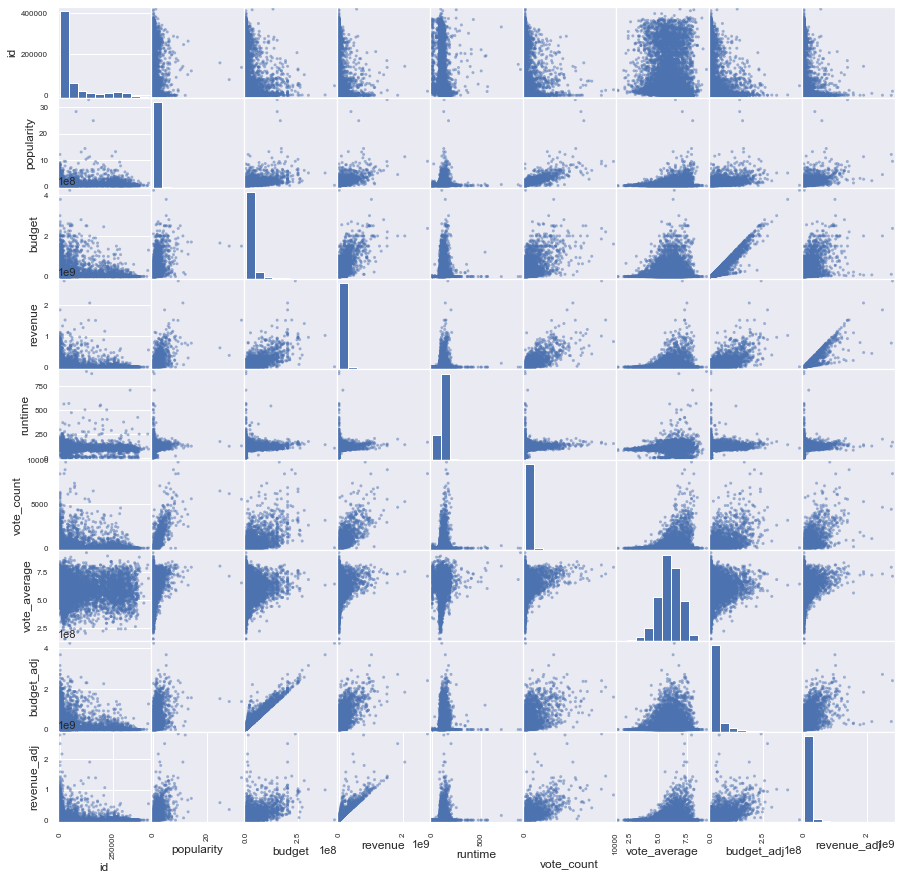

In [17]:
#summary plotting of relations between movies table atrributes 
pd.plotting.scatter_matrix(movies, figsize = (15,15));

### This Shows :
<ul>
    <li>semi strong positive relation between popularity and revenue.     </li>
    <li>semi strong positive relation between popularity and budget.</li>
    <li>very strong positive relation between popularity and voters count.</li>
    <li>weak relation between popularity and runtime.</li>
    <li>weak relation between popularity and vote average.</li>
    <li>weak relation between runtime and vote average.</li>
    <li>weak relation between voters count and vote average.</li>
    <li>weak relation between vote average and revenue.</li>
    <li>semi strong positive relation between revenue and budget. </li>
</ul>

#### What is the distribution of rating?

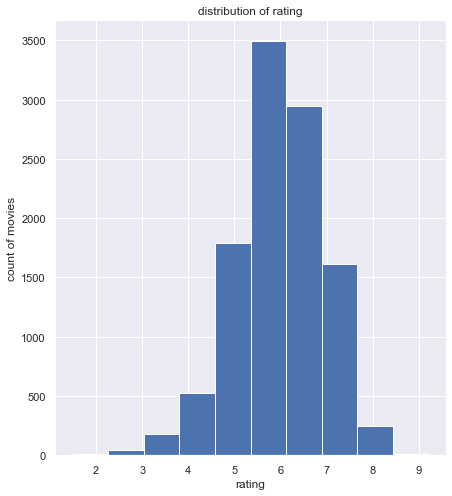

In [18]:
histo = movies['vote_average'].hist(figsize=(7,8));
histo.set_xlabel('rating');
histo.set_ylabel('count of movies');
histo.set_title('distribution of rating');

Rating has almost normal distribution 

#### How many movie released by year?

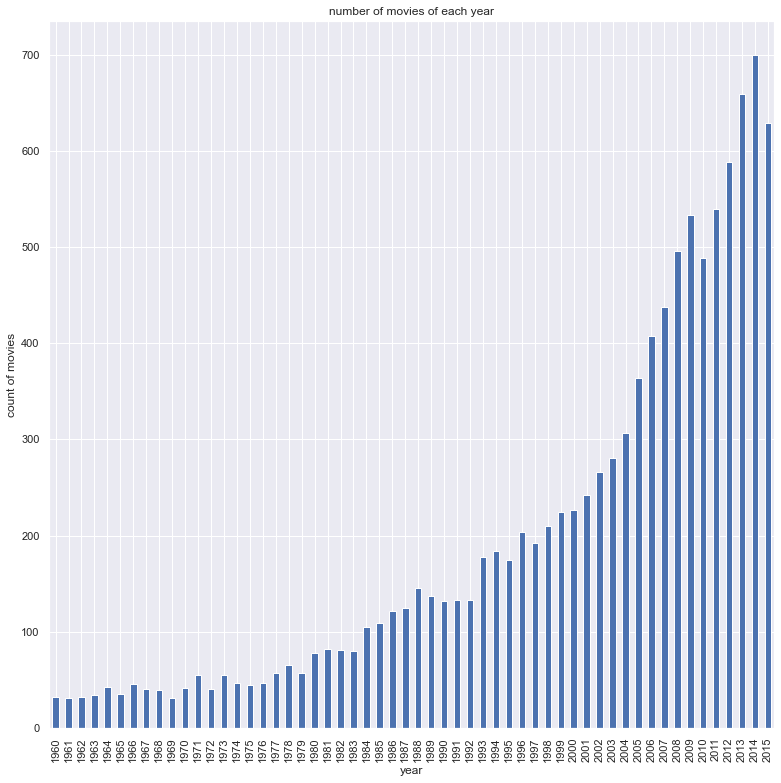

In [19]:
bar = movies.groupby(movies['release_date'].dt.year)['id'].count().plot(kind='bar',figsize=(13,13));
bar.set_xlabel('year');
bar.set_ylabel('count of movies');
bar.set_title('number of movies of each year');

This show the growth of cinema industry and how many films increases by years 

#### How total revenue and budget affected by years?

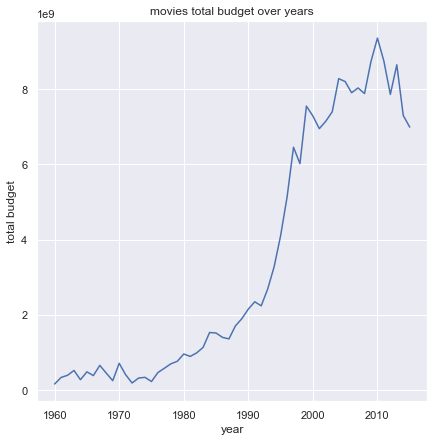

In [20]:
movies.groupby(movies['release_date'].dt.year)['budget_adj'].sum().plot(figsize=(7,7));
plt.xlabel('year');
plt.ylabel('total budget');
plt.title("movies total budget over years");

This show the growth of cinema investing money witch was realtive constant untill 1975 and then increase until the end of 2010 when it decreaserd again.

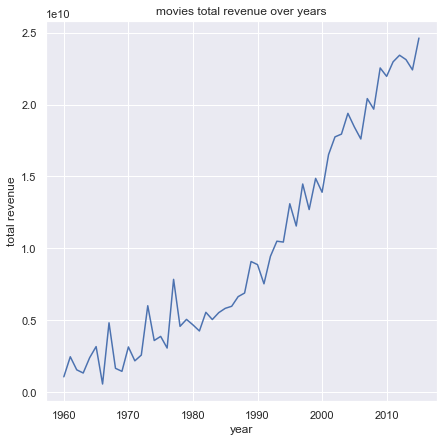

In [21]:
movies.groupby(movies['release_date'].dt.year)['revenue_adj'].sum().plot(figsize=(7,7));
plt.xlabel('year');
plt.ylabel('total revenue');
plt.title("movies total revenue over years");

This show the income of cinema industry witch increases all the time

#### What movie has the most revenue,  budget, net profit?

In [22]:
print("Movie with the top budget     : " , movies.iloc[movies['budget_adj'].argmax()]['original_title'])
print("Movie with the top revenue    : " , movies.iloc[movies['revenue_adj'].argmax()]['original_title'])
print("Movie with the top net profit : " , movies.iloc[(movies['revenue_adj'] - movies['budget_adj']).argmax()]['original_title'])

Movie with the top budget     :  The Warrior's Way
Movie with the top revenue    :  Avatar
Movie with the top net profit :  Star Wars


#### What movie is the top rated in each year?

In [32]:
movies.iloc[movies.groupby(movies['release_date'].dt.year)['vote_average'].idxmax()][["release_date","original_title"]][-5:]

,release_date,original_title
3893,2011-09-03,The Story of Film: An Odyssey
4546,2012-07-27,London 2012 Olympic Opening Ceremony: Isles of...
5829,2013-12-25,Doctor Who: The Time of the Doctor
1200,2014-12-16,Black Mirror: White Christmas
538,2015-01-01,The Mask You Live In


#### Whom Actor has the top popularity movies in average, Whom Actor has the best rating in average, whose movies achived more revenue in total after 1995  ?

In [24]:
#merging casting and movies tables with inner joint
cast_mov_DF = pd.merge(movies,castingDF,how='inner',left_on='id',right_on ='movie_id')

In [25]:
print("Actor with top popularity movies in average after 1995  :", cast_mov_DF[cast_mov_DF['release_date'].dt.year > 1995].groupby(['actor'])['popularity'].mean().idxmax())
print("Actor with top rating movies in average after 1995      :", cast_mov_DF[cast_mov_DF['release_date'].dt.year > 1995].groupby(['actor'])['vote_average'].mean().idxmax())
print("Actor with top total revenue after 1995                 :", cast_mov_DF[cast_mov_DF['release_date'].dt.year > 1995].groupby(['actor'])['revenue_adj'].sum().idxmax())

Actor with top popularity movies in average after 1995  : Josh Helman
Actor with top rating movies in average after 1995      : Agnes de Mille
Actor with top total revenue after 1995                 : Emma Watson


#### How many companies loss and how many profit?

In [26]:
#merging production and movies tables with inner joint
prod_mov_DF = pd.merge(movies,productionDF,how='inner',left_on='id',right_on ='movie_id')

In [27]:
#net profit for production companies
net_profit_DF = pd.DataFrame(prod_mov_DF.groupby(['production_company'])['revenue_adj'].sum() - prod_mov_DF.groupby(['production_company'])['budget_adj'].sum())
net_profit_DF.columns=['net_profit']

In [28]:
#devide data into profit and loss
net_profit_DF['profit'] = pd.cut( x = net_profit_DF['net_profit'], bins=[ net_profit_DF['net_profit'].quantile(q=0), 0 ,net_profit_DF['net_profit'].quantile(q=1)])

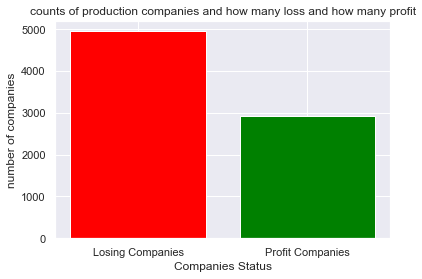

In [29]:
plt.bar(['Losing Companies','Profit Companies'],net_profit_DF.groupby(['profit']).count()['net_profit'],color=['red','green'])
plt.xlabel('Companies Status');
plt.ylabel('number of companies');
plt.title('counts of production companies and how many loss and how many profit');

Losing companies more than profit companies

#### Which genres are most popular, top rating, top revenue in average?

In [30]:
#merging production and movies tables with inner joint
gen_mov_DF = pd.merge(movies,genresDF,how='inner',left_on='id',right_on ='movie_id')

In [31]:
print("Most Popular genre : ", gen_mov_DF.groupby(['genre'])['popularity'].mean().idxmax())
print("Top Rated genre    : ", gen_mov_DF.groupby(['genre'])['vote_average'].mean().idxmax())
print("Top revenue genre  : ", gen_mov_DF.groupby(['genre'])['revenue_adj'].mean().idxmax())

Most Popular genre :  Adventure
Top Rated genre :  Documentary
Top revenue genre :  Adventure


## Conclusions

<ul>
<li>In this data movies starts in 1960, and it takes 35 years to 1995 to have 25% of total movies, 11 years to 2006 to have another 25% and 9 years to 2015 to have the rest 50%. </li>
<li> A semi strong relation is between revenue, budget and poularity, So to any production company more money invested more popular movie and more revanue of course, But the relation is not 100% pure right so it isn't the case all the time.</li>
<li> Movie duration has no effect popularity or rating.</li>
<li> Higher rating movies not nessacary are popular or has big revenue or budget.</li>
<li> Most movies rating between 5.0 and 8.0 and movies with rating over 9.0 are very small number.</li>
<li> Number of movies released by year increases over the years.</li>
<li> Although the continuous increasing total revanue total movies budget was in increasin form untill 2010 when it started to decrease year by year this might be due to the progress of visual effects.</li>
<li> Movie with the top budget "The Warrior's Way" is not the movie with the top revenue "Avatar", but the movie that has the top net profit is "Star Wars".</li>
<li> Production company might go with "Josh Helman" whose movies is the most popularity after, also "Emma Watson" is a very good choice with the most profit movies when she act. on the other hand "Agnes de Mille" participated in movies has the top rating in average. unfortunately she is died. </li>
<li> Production companies are losing over profiting in the rate of 166%. this might be worrying for investing in cinema industry.</li>
<li> Adventure movies is the most popular and achieve the most revenue in average, so it might be the best choise for production companies, On the other hand documentary movies is the most appreciated movies with the most highet rate in average.</li>
</ul>


>This data include documentary movies genre and tv movies witch might has a bad effect on analysis because they are not commercial movies but anyway i did include them in the analysis since i don't have the permission to drop them.
